## `Thai Banknotes (20, 50, 100, 500, 1000) v1.0 (Transer Learning)`

*Upload waste data sets from Google Drive*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Unzip waste data set to working directory in Colab***

In [ ]:
#Import the libraries
import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/MyData/thaibanknotes.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /tmp folder
zip_ref.close()

***Check default tensorflow version***

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.12.0


**Install tensorflow at the same version as local PC**

In [ ]:
!pip install tensorflow==2.9.0

#To change the version of TensorFlow in Colab
!pip install tensorflow==2.9.0

'''
To restart the runtime in Colab, you can follow these steps:
1. Click on "Runtime" in the top menu bar.
2. Select "Restart runtime" from the dropdown menu.
3. A dialog box will appear asking you to confirm that you want to restart the runtime. 
   Click "Yes" to confirm.
4. Colab will then restart the runtime, which may take a few seconds. 
   Any variables or data stored in memory will be lost, 
   so make sure to save your work before restarting the runtime.

Alternatively, you can use the keyboard shortcut "Ctrl+M ."(period) to restart the runtime.
'''

**Import tensorflow and Recheck the version**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.0


***Import MobileNet_v2 (for Transfer Learning)***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout #Conv2D,  MaxPool2D 
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [ ]:
target_img_shape=(128, 128)  


train_dir = './train_set'  

val_dir = './val_set' 

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) 


train_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=target_img_shape,
                                                 batch_size=32,
                                                 class_mode='sparse')

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) 
    
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size=target_img_shape,
                                            batch_size=32,
                                            class_mode='sparse')

Found 800 images belonging to 5 classes.
Found 200 images belonging to 5 classes.


{'THAI100': 0, 'THAI1000': 1, 'THAI20': 2, 'THAI50': 3, 'THAI500': 4}
(32, 128, 128, 3)
(32,)
0.0 1.0
class: 2.0


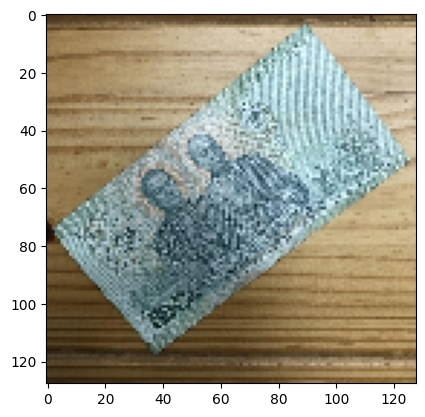

In [ ]:
print(train_set.class_indices)


for image_batch, labels_batch in train_set:
    print(image_batch.shape)
    print(labels_batch.shape)
    
    img = image_batch[0] - image_batch[0].min()
    img /= 2.0
   
    print(img.min(), img.max())
    plt.imshow(img)

    print('class:', labels_batch[0])    
    break

In [ ]:
ids, counts = np.unique(train_set.classes, return_counts=True)

print(ids)
print(counts)

[0 1 2 3 4]
[160 160 160 160 160]


In [ ]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels   

for i in ids:
    print('{:>8} = {}' . format(labels[i], counts[i]))


 THAI100 = 160
THAI1000 = 160
  THAI20 = 160
  THAI50 = 160
 THAI500 = 160


In [ ]:
label_names = [k for k in train_set.class_indices]
label_names

['THAI100', 'THAI1000', 'THAI20', 'THAI50', 'THAI500']

In [ ]:
import pandas as pd

df_train_labels = pd.DataFrame({'Label':label_names, 'Count':counts})
df_train_labels.set_index('Label', inplace=True)
df_train_labels

Count
Label          
THAI100     160
THAI1000    160
THAI20      160
THAI50      160
THAI500     160

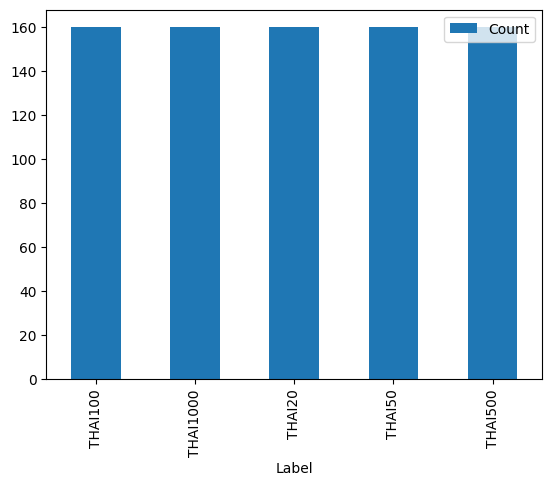

In [ ]:
df_train_labels.plot.bar()
plt.show()

In [ ]:
ids, counts = np.unique(val_set.classes, return_counts=True)

print(ids)
print(counts)

[0 1 2 3 4]
[40 40 40 40 40]


In [ ]:
_, train_count = np.unique(train_set.classes, return_counts=True)
_, val_count = np.unique(val_set.classes, return_counts=True)

print('Ratio Validation/Training set:', val_count/train_count * 100)

Ratio Validation/Training set: [25. 25. 25. 25. 25.]


In [ ]:
in_shape = (target_img_shape[0], target_img_shape[1], 3)  


base_model = MobileNetV2(include_top=False, weights='imagenet',
                   input_shape=in_shape)  

model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))  
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.4))
model.add(Dense(5, activation='softmax'))  

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 256)               5243136   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [ ]:
base_model.trainable = False 

In [ ]:
print("Trainable..\n---")
for variable in model.trainable_variables:
    print(variable.name)  

Trainable..
---
dense/kernel:0
dense/bias:0
dense_1/kernel:0
dense_1/bias:0
dense_2/kernel:0
dense_2/bias:0


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 256)               5243136   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [ ]:
import time

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', 
             metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', verbose=1, patience=5) # 
mc = ModelCheckpoint('best_model5cls.h5', monitor='val_accuracy', verbose=1, save_best_only=True)

start = time.time()
history = model.fit(train_set, 
                    validation_data=val_set, 
                    epochs=20, verbose=1, callbacks=[es, mc])

end = time.time()
print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/20
25/25 [==============================] - ETA: 0s - loss: 5.0071 - accuracy: 0.2550
Epoch 1: val_accuracy improved from -inf to 0.30000, saving model to best_model5cls.h5
25/25 [==============================] - 30s 1s/step - loss: 5.0071 - accuracy: 0.2550 - val_loss: 2.0226 - val_accuracy: 0.3000
Epoch 2/20
25/25 [==============================] - ETA: 0s - loss: 1.8946 - accuracy: 0.3613
Epoch 2: val_accuracy did not improve from 0.30000
25/25 [==============================] - 25s 998ms/step - loss: 1.8946 - accuracy: 0.3613 - val_loss: 1.7203 - val_accuracy: 0.2700
Epoch 3/20
25/25 [==============================] - ETA: 0s - loss: 1.4921 - accuracy: 0.4225
Epoch 3: val_accuracy improved from 0.30000 to 0.38000, saving model to best_model5cls.h5
25/25 [==============================] - 23s 935ms/step - loss: 1.4921 - accuracy: 0.4225 - val_loss: 1.5915 - val_accuracy: 0.3800
Epoch 4/20
25/25 [==============================] - ETA: 0s - loss: 1.2421 - accuracy: 0.5025
Epo

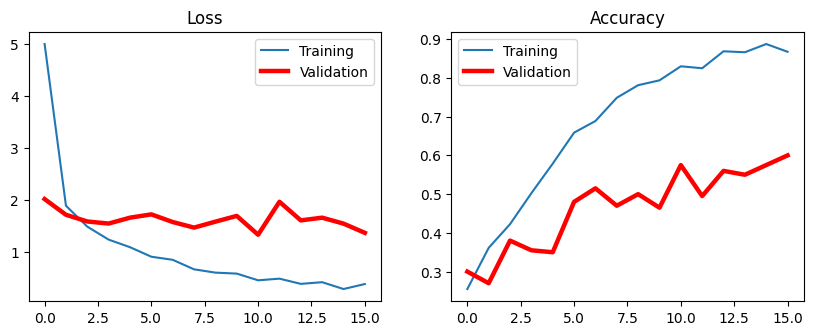

In [ ]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'],'r', lw=3.2, label='Validation')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')

plt.legend()
plt.show()

In [ ]:
print(len(val_set))
acc = model.evaluate(val_set, steps=len(val_set), verbose=1)
print('score = {:.3f}' .format(acc[1]))

7
7/7 [==============================] - 5s 603ms/step - loss: 1.3727 - accuracy: 0.6000
score = 0.600


*Predict*

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict(img_fname):
    img = load_img(img_fname, target_size=target_img_shape) 
    plt.imshow(img)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    
    pred = model.predict(img)  
    pred_cls = labels[np.argmax(pred, -1)[0]]   
    print('Prediction:', pred_cls, pred[0].round(3))
    return(pred_cls, pred) 

In [ ]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels 

{0: 'THAI100', 1: 'THAI1000', 2: 'THAI20', 3: 'THAI50', 4: 'THAI500'}

1/1 [==============================] - 1s 816ms/step
Prediction: THAI100 [0.957 0.035 0.005 0.    0.003]


'THAI100'

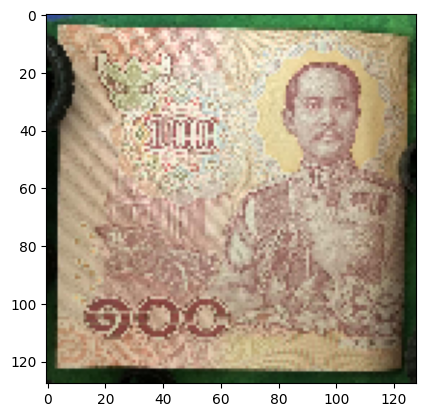

In [ ]:
_,pred_result = predict('./val_set/THAI100/THAI100_169.jpg')
labels[np.argmax(pred_result, -1)[0]]

1/1 [==============================] - 0s 43ms/step
Prediction: THAI1000 [0.115 0.686 0.01  0.036 0.153]


'THAI1000'

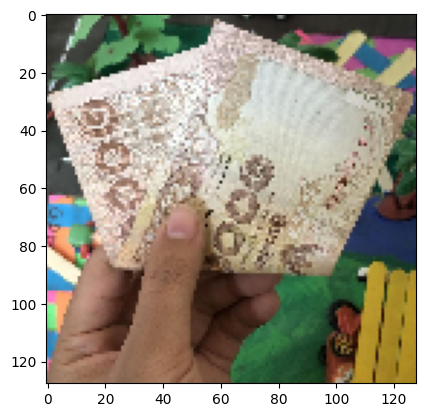

In [ ]:
_,pred_result = predict('./val_set/THAI1000/THAI1000_0171.jpg')
labels[np.argmax(pred_result, -1)[0]]

1/1 [==============================] - 0s 38ms/step
Prediction: THAI1000 [0.041 0.901 0.024 0.01  0.025]


'THAI1000'

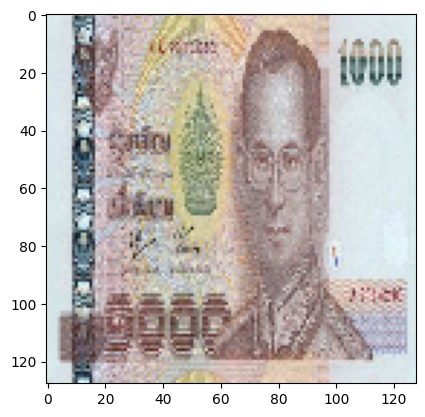

In [ ]:
_,pred_result = predict('./test_set/ThaiBankNote_img_0017.jpg')
labels[np.argmax(pred_result, -1)[0]]

1/1 [==============================] - 0s 42ms/step
Prediction: THAI1000 [0.018 0.884 0.014 0.026 0.058]
THAI1000


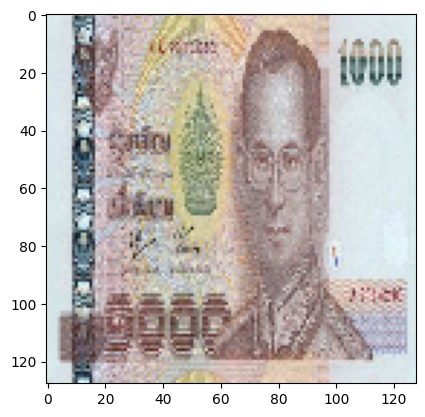

1/1 [==============================] - 0s 39ms/step
Prediction: THAI100 [0.988 0.011 0.    0.    0.001]
THAI100


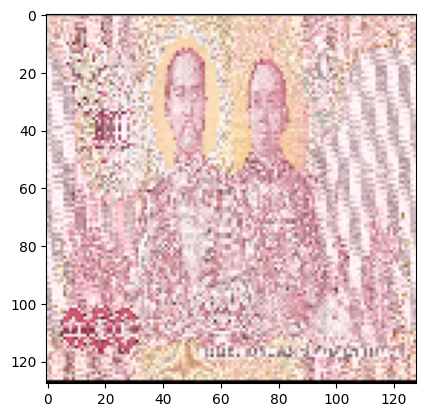

1/1 [==============================] - 0s 40ms/step
Prediction: THAI50 [0.16  0.163 0.204 0.252 0.221]
THAI50


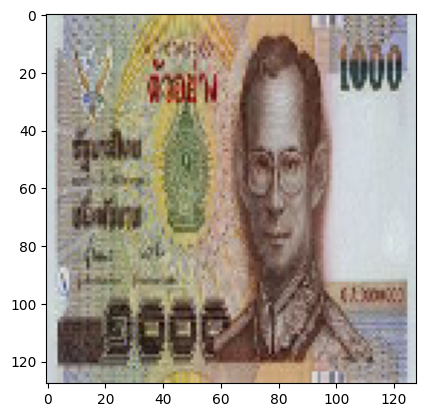

1/1 [==============================] - 0s 36ms/step
Prediction: THAI1000 [0.035 0.811 0.017 0.03  0.107]
THAI1000


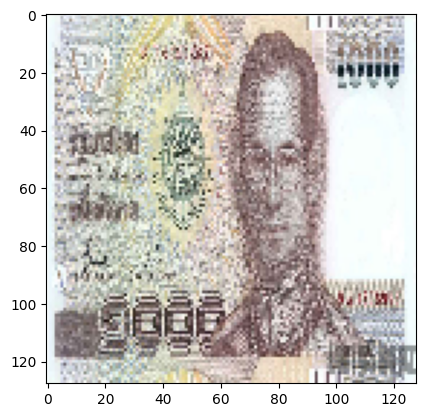

1/1 [==============================] - 0s 37ms/step
Prediction: THAI100 [0.965 0.011 0.01  0.004 0.009]
THAI100


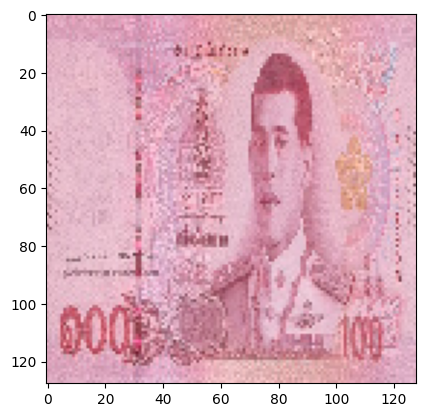

1/1 [==============================] - 0s 35ms/step
Prediction: THAI100 [0.417 0.045 0.174 0.274 0.09 ]
THAI100


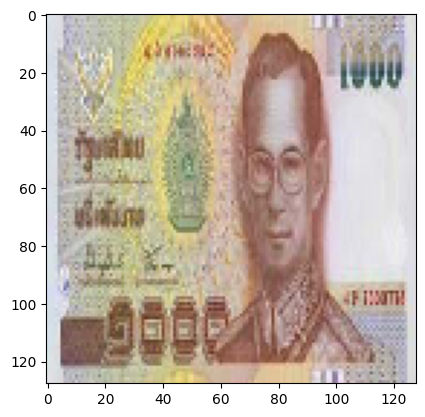

1/1 [==============================] - 0s 36ms/step
Prediction: THAI1000 [0.093 0.438 0.071 0.192 0.206]
THAI1000


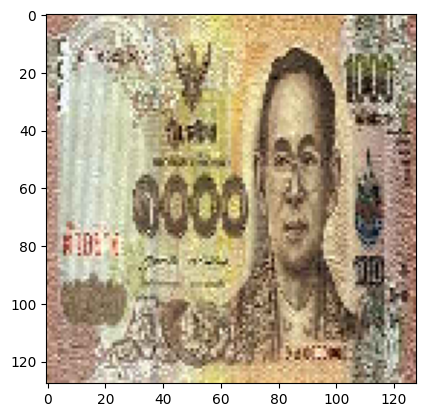

1/1 [==============================] - 0s 37ms/step
Prediction: THAI50 [0.1   0.021 0.166 0.64  0.073]
THAI50


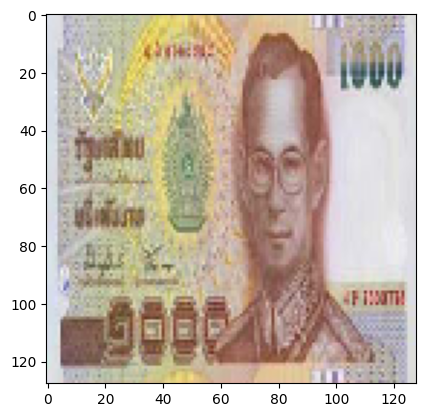

1/1 [==============================] - 0s 38ms/step
Prediction: THAI100 [0.435 0.148 0.171 0.076 0.171]
THAI100


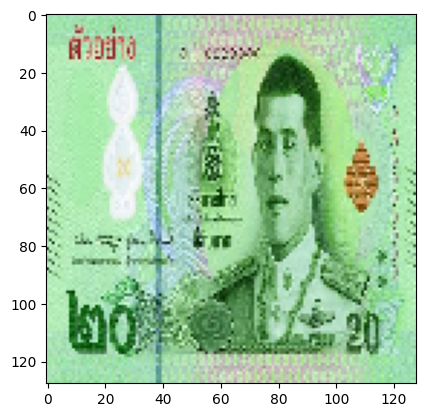

1/1 [==============================] - 0s 37ms/step
Prediction: THAI1000 [0.106 0.493 0.111 0.084 0.206]
THAI1000


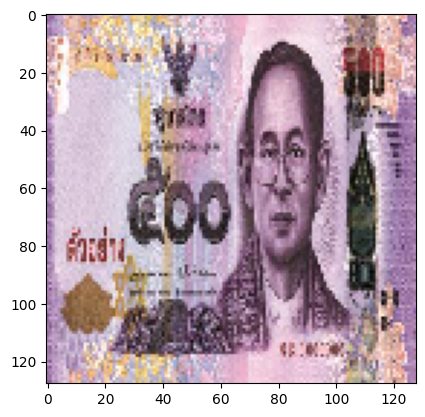

In [ ]:
import glob

mytestlist = [f for f in glob.glob('./test_set/*')]
for testimg in mytestlist:
  index = mytestlist.index(testimg)
  mypredlist,pred_result = predict(mytestlist[index])
  print(labels[np.argmax(pred_result, -1)[0]]) 
  plt.show()

***Save Model in .h5 for Use***

In [ ]:
model.save('./tbn_model.h5')

***Save Model in folder for Use***

In [ ]:
model.save('./mytbnmodel')

***Save class config to decode prediction result to class name*** *(Thai Banknotes)*

In [ ]:
import pickle
file_name = 'classname.pkl'
open_file = open(file_name, "wb")
pickle.dump(labels, open_file)
open_file.close()

***Load h5 for Use***

In [ ]:
from tensorflow.keras.models import load_model  # lib load model
my_model = load_model('./tbn_model.h5') # load model h5

In [ ]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 256)               5243136   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [ ]:
my_model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 128, 128, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'mobilenetv2_1.00_128_input'}},
  {'class_name': 'Functional',
   'config': {'name': 'mobilenetv2_1.00_128',
    'layers': [{'class_name': 'InputLayer',
      'config': {'batch_input_shape': (None, 128, 128, 3),
       'dtype': 'float32',
       'sparse': False,
       'ragged': False,
       'name': 'input_1'},
      'name': 'input_1',
      'inbound_nodes': []},
     {'class_name': 'Conv2D',
      'config': {'name': 'Conv1',
       'trainable': False,
       'dtype': 'float32',
       'filters': 32,
       'kernel_size': (3, 3),
       'strides': (2, 2),
       'padding': 'same',
       'data_format': 'channels_last',
       'dilation_rate': (1, 1),
       'groups': 1,
       'activation': 'linear',
       'use_bias': False,
       'kernel_initializer': {'class_name': 'GlorotUniform',
    

In [ ]:
import pickle
file_name = "classname.pkl"
open_file = open(file_name, "rb")
class_names = pickle.load(open_file)
open_file.close()
class_names

{0: 'THAI100', 1: 'THAI1000', 2: 'THAI20', 3: 'THAI50', 4: 'THAI500'}

1/1 [==============================] - 1s 1s/step
[[0.04134858 0.9006019  0.02364708 0.00973736 0.02466513]]


'THAI1000'

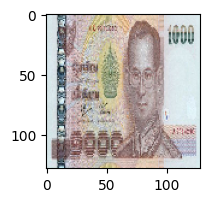

In [ ]:
from keras.models import load_model
from keras.preprocessing import image

# tf version 2.9.0 the load_img, img_to_array moved to utlis
# from tensorflow.keras.preprocessing.image import load_img, img_to_array

from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

# insert code to take a picture snapshot of image from camara device 
# and save the image file and input the image file 
input_image = './test_set/ThaiBankNote_img_0017.jpg'
img = load_img(input_image, target_size=(128, 128))
plt.figure(figsize=(2, 2))
plt.imshow(img)

pred_image = img_to_array(img)
pred_image = np.expand_dims(pred_image, axis=0)
pred_image = preprocess_input(pred_image)

my_model = load_model('./tbn_model.h5') # load model h5
pred_result = my_model.predict(pred_image)
print(pred_result)
class_names[np.argmax(pred_result, -1)[0]]

***Convert .h5 to TensorFlow Lite (Normal)***

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('./tbn_model.h5') # 

In [ ]:
model.summary()
model.get_config()['layers'][0]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 flatten (Flatten)           (None, 20480)             0         
                                                                 
 dense (Dense)               (None, 256)               5243136   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

{'class_name': 'InputLayer',
 'config': {'batch_input_shape': (None, 128, 128, 3),
  'dtype': 'float32',
  'sparse': False,
  'ragged': False,
  'name': 'mobilenetv2_1.00_128_input'}}

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_tbn_model = converter.convert()

f = open('tbn_model.tflite', "wb")
f.write(tflite_tbn_model)
f.close()

regular_model_size = len(tflite_tbn_model) / 1024
print('Regular model size = %d KBs.' % regular_model_size)

Regular model size = 29273 KBs.


***Convert .h5 to TensorFlow Lite (Optimized)***

In [ ]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_optimized_model = converter.convert()

optimized_model_size = len(tflite_optimized_model) / 1024
print('Optimized model size = %d KBs,' % optimized_model_size)
print('which is about %d%% of the regular model size.'\
      % (optimized_model_size * 100 / regular_model_size))

f = open('opt_tbn_model.tflite', "wb")
f.write(tflite_optimized_model)
f.close()

Optimized model size = 7608 KBs,
which is about 25% of the regular model size.


***Use TensorFlow Lite to Predict***

input shape: [  1 128 128   3]
Total prediction time:  0.01636052131652832
THAI1000


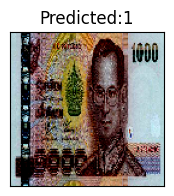

In [ ]:
import tensorflow as tf
from time import time

tflite_path = 'tbn_model.tflite' 


interpreter = tf.lite.Interpreter(model_path=tflite_path)
interpreter.allocate_tensors()

input = interpreter.get_input_details()
input_shape = input[0]['shape']
print('input shape:', input_shape)

input_tensor_index = input[0]["index"]
output = interpreter.tensor(interpreter.get_output_details()[0]["index"])

interpreter.set_tensor(input_tensor_index, pred_image) # 

time_start = time()
interpreter.invoke()

time_end = time()
total_tflite_time = time_end - time_start
print("Total prediction time: ", total_tflite_time)

digit = np.argmax(output()[0])
#print(digit)
print(class_names[digit])

plt.figure(figsize=(2, 2))
plt.imshow(pred_image[0], cmap=plt.cm.gray_r)
plt.title('Predicted:{}'. format(digit))
plt.xticks([]) ; plt.yticks([])
plt.show()